**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
# write your code here
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

# style ggplot of matplotlib
plt.style.use('ggplot')

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [7]:
import numpy as np 
import sympy as sm

# Define the symbols
L = sm.symbols('L')  # Labor
w = sm.symbols('w')  # Real wage
tau = sm.symbols('tau')  # Labor-income tax rate
C = sm.symbols('C')  # Private consumption
kappa = sm.symbols('kappa')  # Free private consumption component
alpha = sm.symbols('alpha')  # Weight of private consumption
G = sm.symbols('G')  # Government consumption
nu = sm.symbols('nu')  # Disutility of labor scaling factor
tilde_w = sm.symbols('w_tilde')

# Define parameter values
alpha_val = 0.5
kappa_val = 0.1
nu_val = (1/(2*16**2))
w_val = 1
tau_val = 0.3
G_val = 1
tilde_w_values = np.linspace(0.1, 10, 100)


# Define the utility function
U = sm.ln(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# Constraint 
C_sub = kappa + tilde_w * L
C_sub

# Definign the w tilde function
# tilde_w = w * (1 - tau)

# Substitute the constraint into the utility function
U_subs_C = U.subs(C, C_sub)
U_subs_C

# Take derivative with respect to L
U_prime = sm.diff(U_subs_C, L)
U_prime

# # Set derivative equal to zero and solve for L
L_star = sm.solve(U_prime, L)

# # Print the solution for L
eq = sm.Eq(L, L_star[1])

# # Print the solution for L
print(f'This gives an optimal labor supply choice which is equivilant to what was given in the quesiton:')
eq

This gives an optimal labor supply choice which is equivilant to what was given in the quesiton:


Eq(L, (-kappa*nu + sqrt(nu*(4*alpha*w_tilde**2 + kappa**2*nu)))/(2*nu*w_tilde))

In [4]:
# Define the utility function
U = sm.ln(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# Constraint 
C_sub = kappa + tilde_w * L
C_sub

# Substitute the constraint into the utility function
U_subs_C = U.subs(C, C_sub)
U_subs_C

# Take derivative with respect to L
U_prime = sm.diff(U_subs_C, L)
U_prime

# # Set derivative equal to zero and solve for L
L_star = sm.solve(U_prime, L)

# # Print the solution for L
eq = sm.Eq(L, L_star[1])

# # Print the solution for L
print(f'This gives an optimal labor supply choice which is equivilant to what was given in the quesiton:')
eq





This gives an optimal labor supply choice which is equivilant to what was given in the quesiton:


Eq(L, (-kappa*nu + sqrt(nu*(4*alpha*w_tilde**2 + kappa**2*nu)))/(2*nu*w_tilde))

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

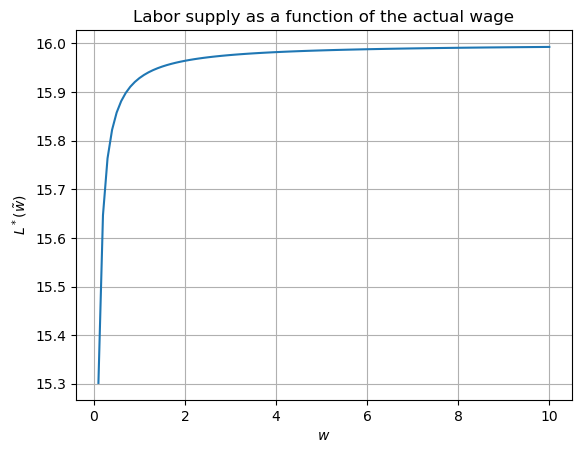

In [9]:
# Turning into a python function
L_star_func = sm.lambdify(( kappa, alpha, G, nu, tilde_w), L_star[1])

# Calculate the optimal labor supply for different values of tilde_w
func = lambda x: L_star_func(kappa_val, alpha_val, G_val, nu_val, x)

# List of wages 
w_list = np.linspace(0.1, 10, 100)

# Tilde for given wages 
tilde_w_list = (1 - tau_val) * w_list

#Lstar for given tilde wages
L_star_val = func(tilde_w_list)


# Plotting the relationg between tilde_w and L
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tilde_w_values, L_star_val)
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$L^*(\tilde{w})$')
ax.set_title('Labor supply as a function of the actual wage')
ax.grid(True)
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (1/2)*(-kappa*nu + sqrt(nu*(4*alpha*w_tilde**2 + kappa**2*nu)))/(nu*w_tilde)
C:\Users\sbang\AppData\Local\Temp\ipykernel_21848\1140248139.py:18: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1-alpha)) - nu*L**2/2


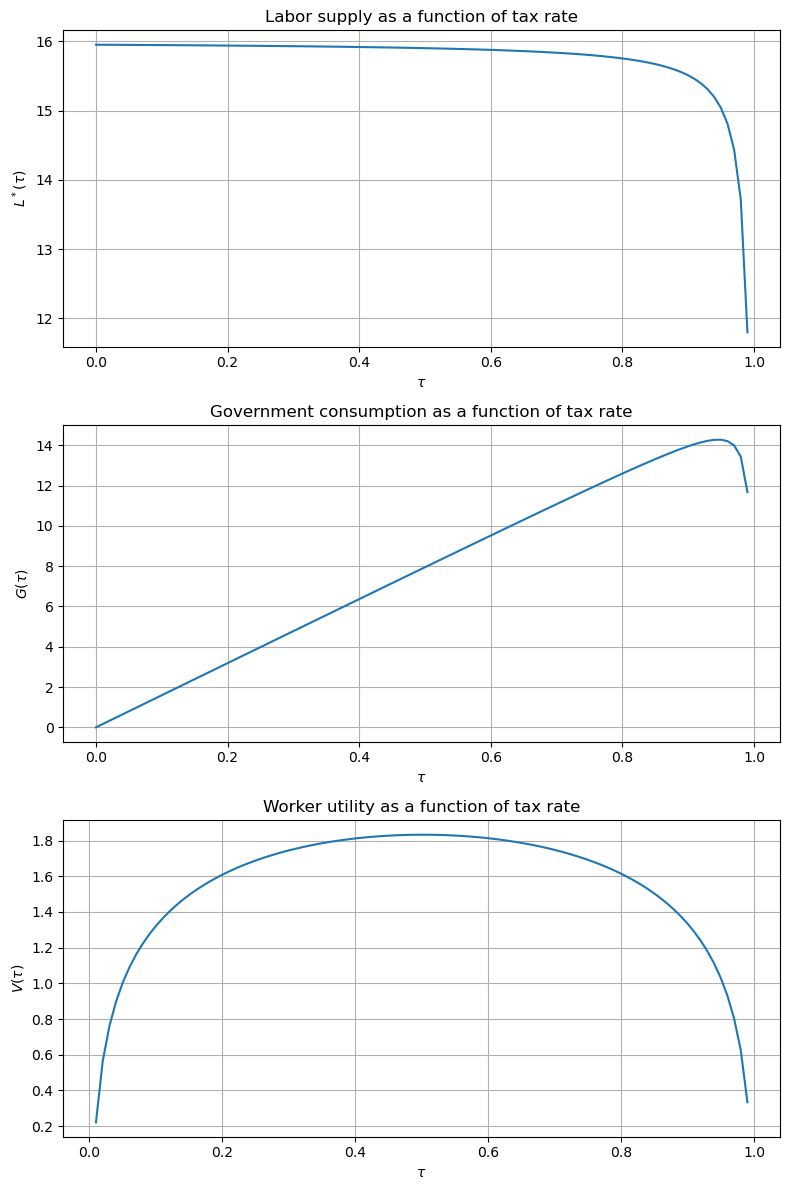

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define function for labor supply and government consumption
def L_star(tau, w=w_val, kappa=kappa_val, alpha=alpha_val, G=G_val, nu=nu_val):
    tilde_w = (1 - tau) * w
    return L_star_func(kappa, alpha, G, nu, tilde_w)

def G_func(tau, w=w_val, L_func=L_star):
    return tau * w * L_func(tau)

# Define function for worker utility
def V(tau, w=w_val, kappa=kappa_val, alpha=alpha_val, G_func=G_func, L_func=L_star, nu=nu_val):
    tilde_w = (1 - tau) * w
    L = L_func(tau)
    C = kappa + tilde_w * L
    G = G_func(tau)
    return np.log(C**alpha * G**(1-alpha)) - nu*L**2/2

# Grid of tau values
tau_values = np.linspace(0, 1, 100)

# Calculate labor supply, government consumption and worker utility for each tau
L_values = [L_star(tau) for tau in tau_values]
G_values = [G_func(tau) for tau in tau_values]
V_values = [V(tau) for tau in tau_values]

# Plot labor supply, government consumption and worker utility
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

ax[0].plot(tau_values, L_values)
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel(r'$L^*(\tau)$')
ax[0].set_title('Labor supply as a function of tax rate')
ax[0].grid(True)

ax[1].plot(tau_values, G_values)
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel(r'$G(\tau)$')
ax[1].set_title('Government consumption as a function of tax rate')
ax[1].grid(True)

ax[2].plot(tau_values, V_values)
ax[2].set_xlabel(r'$\tau$')
ax[2].set_ylabel(r'$V(\tau)$')
ax[2].set_title('Worker utility as a function of tax rate')
ax[2].grid(True)

plt.tight_layout()
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The optimal tax rate is: 0.50


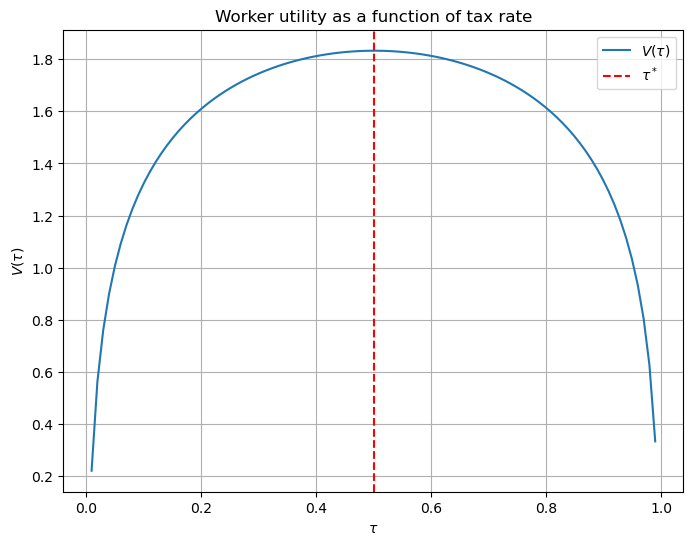

In [19]:
from scipy.optimize import minimize

# Define the objective function as the negative of the worker utility function
objective_func = lambda tau: -V(tau)

# Initial guess for tau
tau_initial_guess = 0.5

# Optimize
result = minimize(objective_func, tau_initial_guess, bounds=[(0, 1)])

# Retrieve the optimal tax rate
tau_star = result.x[0]

# Print the optimal tax rate
print(f"The optimal tax rate is: {tau_star:.2f}")

# Plot worker utility as a function of tax rate with the optimal tax rate
plt.figure(figsize=(8, 6))
plt.plot(tau_values, V_values)
plt.axvline(x=tau_star, color='r', linestyle='--')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$V(\tau)$')
plt.title('Worker utility as a function of tax rate')
plt.grid(True)
plt.legend([r'$V(\tau)$', r'$\tau^*$'])
plt.show()


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma - 1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [22]:
from scipy.optimize import minimize, root

# Additional parameters
sigma_values = [1.001, 1.5]
rho_values = [1.001, 1.5]
epsilon_values = [1.0, 1.0]
tau = 0.5  # the optimal tax rate found in question 4

# Define the new utility function
def V_v2(L, tau, G, w=w_val, kappa=kappa_val, alpha=alpha_val, nu=nu_val, rho=1.001, sigma=1.001, epsilon=1.0):
    tilde_w = (1 - tau) * w
    C = kappa + tilde_w * L
    U = (((alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(sigma - 1)))**(1 - rho) - 1)/(1-rho)
    disutility = nu * L**(1 + epsilon) / (1 + epsilon)
    return U - disutility

# Define a function that solves the worker's problem
def L_star_v2(tau, G, rho=1.001, sigma=1.001, epsilon=1.0):
    objective_func = lambda L: -V_v2(L, tau, G, rho=rho, sigma=sigma, epsilon=epsilon)
    result = minimize(objective_func, 0.5, bounds=[(0, 24)])
    return result.x[0]

# Define a function that solves the government's problem
def G_func_v2(tau, rho=1.001, sigma=1.001, epsilon=1.0):
    func = lambda G: G - tau * w_val * L_star_v2(tau, G, rho=rho, sigma=sigma, epsilon=epsilon)
    result = root(func, 1.0)  # Let's start with initial guess of 1.0 for G
    return result.x[0]

# Find the equilibrium level of G for each parameter set
for i in range(2):
    sigma = sigma_values[i]
    rho = rho_values[i]
    epsilon = epsilon_values[i]
    G_star = G_func_v2(tau, rho=rho, sigma=sigma, epsilon=epsilon)
    print(f"For parameter set {i+1} (sigma = {sigma}, rho = {rho}, epsilon = {epsilon}):")
    print(f"The equilibrium level of G is: {G_star:.2f}")


For parameter set 1 (sigma = 1.001, rho = 1.001, epsilon = 1.0):
The equilibrium level of G is: 1.00
For parameter set 2 (sigma = 1.5, rho = 1.5, epsilon = 1.0):
The equilibrium level of G is: 5.23


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [30]:
from scipy.optimize import minimize, basinhopping

# Define the utility function using the optimal labor L_star_v2 and government consumption G_func_v2
def social_utility(tau, rho=1.001, sigma=1.001, epsilon=1.0):
    G = G_func_v2(tau, rho=rho, sigma=sigma, epsilon=epsilon)
    L = L_star_v2(tau, G, rho=rho, sigma=sigma, epsilon=epsilon)
    return -V_v2(L, tau, G, rho=rho, sigma=sigma, epsilon=epsilon)

# A wrapper function for basinhopping
def social_utility_for_basinhopping(tau, *args):
    return social_utility(tau[0], *args)

# Find the socially optimal tax rate for each parameter set
for i in range(2):
    sigma = sigma_values[i]
    rho = rho_values[i]
    epsilon = epsilon_values[i]
    initial_guess = [0.2]  # You may need to adjust this initial guess as appropriate

    # Perform global optimization using basinhopping
    minimizer_kwargs = {"args": (rho, sigma, epsilon), "bounds": [(0.01, 0.99)]}
    result = basinhopping(social_utility_for_basinhopping, initial_guess, minimizer_kwargs=minimizer_kwargs, niter=5)
    tau_star_social = result.x[0]

    print(f"For parameter set {i+1} (sigma = {sigma}, rho = {rho}, epsilon = {epsilon}):")
    print(f"The socially optimal tax rate is: {tau_star_social:.2f}")


For parameter set 1 (sigma = 1.001, rho = 1.001, epsilon = 1.0):
The socially optimal tax rate is: 0.39


C:\Users\sbang\AppData\Local\Temp\ipykernel_21848\4123778514.py:13: RuntimeWarning: invalid value encountered in power
  U = (((alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(sigma - 1)))**(1 - rho) - 1)/(1-rho)
C:\Users\sbang\AppData\Local\Temp\ipykernel_21848\4123778514.py:13: RuntimeWarning: invalid value encountered in double_scalars
  U = (((alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(sigma - 1)))**(1 - rho) - 1)/(1-rho)


For parameter set 2 (sigma = 1.5, rho = 1.5, epsilon = 1.0):
The socially optimal tax rate is: 0.44


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
import numpy as np

# Constants
eta = 0.5
w = 1.0

def profit(kappa, l):
    return kappa * l ** (1 - eta) - w * l

def optimal_l(kappa):
    return ((1 - eta) * kappa / w) ** (1 / eta)

kappas = [1.0, 2.0]

for kappa in kappas:
    l_optimal = optimal_l(kappa)
    profit_optimal = profit(kappa, l_optimal)

    l_values = np.linspace(0.5 * l_optimal, 1.5 * l_optimal, 100)
    profits = [profit(kappa, l) for l in l_values]

    print(f"For kappa = {kappa}:")
    print(f"Optimal l: {l_optimal}")
    print(f"Profit at optimal l: {profit_optimal}")
    print(f"Max profit computed: {max(profits)}")
    print()


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
import numpy as np

# Parameters
rho = 0.90
iota = 0.01
sigma_eps = 0.10
R = (1+0.01)**(1/12)
eta = 1 # assuming eta from the earlier problem
w = 0.5 # assuming a wage rate
K = 1000 # number of simulations for approximation
T = 120 # 10 years, 120 months

# Function to generate kappa_t
def generate_kappa(rho, sigma_eps, T):
    eps = np.random.normal(-0.5 * sigma_eps**2, sigma_eps, T)
    kappa = np.zeros(T)
    kappa[0] = 1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + eps[t])
    return kappa

# Function to calculate l_t
def calculate_lt(kappa_t, w, eta):
    return ((1 - eta) * kappa_t / w)**(1 / eta)

# Function to calculate ex post value
def calculate_h(kappa, l, R, w, eta, iota):
    T = len(kappa)
    h = 0
    for t in range(T):
        h += R**(-t) * (kappa[t] * l[t]**(1 - eta) - w * l[t] - int(l[t] != l[t - 1]) * iota)
    return h

# Run simulations
H_values = []
for k in range(K):
    kappa = generate_kappa(rho, sigma_eps, T)
    l = calculate_lt(kappa, w, eta)
    h = calculate_h(kappa, l, R, w, eta, iota)
    H_values.append(h)

# Calculate H
H = np.mean(H_values)
print(f"H: {H}")


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# Function to calculate l_t
def calculate_lt_new(kappa, l_prev, w, eta, delta):
    l_star = ((1 - eta) * kappa / w)**(1 / eta)
    if abs(l_prev - l_star) > delta:
        return l_star
    else:
        return l_prev

# Run simulations
H_values_new = []
for k in range(K):
    kappa = generate_kappa(rho, sigma_eps, T)
    
    # Initialize labor array
    l = np.zeros(T)
    l[0] = calculate_lt(kappa[0], w, eta)  # assuming previous labor (l[-1]) is 0
    
    # Calculate labor according to the new policy
    for t in range(1, T):
        l[t] = calculate_lt_new(kappa[t], l[t-1], w, eta, delta=0.05)
    
    h = calculate_h(kappa, l, R, w, eta, iota)
    H_values_new.append(h)

# Calculate H
H_new = np.mean(H_values_new)
print(f"H for new policy: {H_new}")


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# Array of potential delta values
delta_values = np.linspace(0, 0.2, 100)  # You might want to adjust this range and step size

H_values = []

# Grid search
for delta in delta_values:
    H_values_temp = []
    
    for k in range(K):
        kappa = generate_kappa(rho, sigma_eps, T)
        
        # Initialize labor array
        l = np.zeros(T)
        l[0] = calculate_lt(kappa[0], w, eta)  # assuming previous labor (l[-1]) is 0
        
        # Calculate labor according to the new policy
        for t in range(1, T):
            l[t] = calculate_lt_new(kappa[t], l[t-1], w, eta, delta=delta)
        
        h = calculate_h(kappa, l, R, w, eta, iota)
        H_values_temp.append(h)
    
    # Calculate H for this delta
    H_values.append(np.mean(H_values_temp))

# Find optimal delta
optimal_delta_index = np.argmax(H_values)
optimal_delta = delta_values[optimal_delta_index]

print(f"The optimal value of delta that maximizes H is: {optimal_delta}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('H')
plt.title('Expected value H as a function of Delta')
plt.axvline(optimal_delta, color='red', linestyle='--')
plt.grid(True)
plt.show()



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Compare the convergence of the optimizer with K=10 to K=100, 